In [1]:
### Unternehmen stellt 
# - zwei verschiedene Produkte her
# - für deren Fertigung drei Maschinen A, B, C zur Verfügung stehen

###  Maschinen 
# Maximale monatliche Laufzeit (Kapazität): 
#      A:  170 Stunden 
#      B:  150 Stunden 
#      C:   80 Stunden 

### ME => Deckungsbeitrag
# Eine Mengeneinheit (ME) von liefert eine Deckungsbeitrag von..
#   1 ME von Produkt 1 =>  Deckungsbeitrag 300 Euro
#   1 ME von Produkt 2 =>  Deckungsbeitrag 500 Euro.

### Produktions-Dauer
# 1 ME von Produkt 1 =>  1 Stunde  durch Maschine A 
#                    =>  1 Stunde  durch Maschine B
# 1 ME von Produkt 2 =>  2 Stunden durch Maschine A
#                    =>  1 Stunde  durch Maschine B 
#                    =>  3 Stunden Maschine C

### Ziel 
# Produktionsmengen bestimmen, welche 
# 1. Deckungsbeitrag maximiert
# 2. ohne die Maschinenkapazitäten zu überschreiten
#
# (Fixkosten werden ignoriert)


In [2]:
#### Ziel: maximiere deckungsbeitrag

## Maximiere
#
#      Deckungbeitrag = 300 * p1 + 500 * p2

## Randbedinungen
#   p1 + 2 * p2 <= 170   # Maschine A
#   p1 + p2     <= 150   # Maschine B
#   3 * p2      <= 80    # Maschine C

## Nichtnegativitätsbedingung
# p1, p2 >= 0 

In [3]:
import pulp as p 
  
### Erzeuge LP-Minimierungsproblem 
# Name + Ziel 
Lp_prob = p.LpProblem('Deckungsbeitrag', p.LpMaximize) 
  

### Problem-Variablen + Nichtnegativitätsbedingung
# 1. Definere LP-Variablen - die Variablen in Zielfunktion
# 2. Setze unter Schranke für Variablen - 0
# 3. Setze obere Schranke => None als default - kann aber definiert werden
p1 = p.LpVariable("p1", lowBound = 0)   #  p1 >= 0 
p2 = p.LpVariable("p2", lowBound = 0)   #  p2 >= 0 
  
### Zielfunktion
# => als Funktion der Variablen
Lp_prob += 300 * p1 + 500 * p2
  
# Randbedingungen definieren 
Lp_prob += p1 + 2 * p2 <= 170
Lp_prob += p1 + p2     <= 150
Lp_prob += 3 * p2      <= 80

print(Lp_prob) 

Deckungsbeitrag:
MAXIMIZE
300*p1 + 500*p2 + 0
SUBJECT TO
_C1: p1 + 2 p2 <= 170

_C2: p1 + p2 <= 150

_C3: 3 p2 <= 80

VARIABLES
p1 Continuous
p2 Continuous



In [4]:
status = Lp_prob.solve()    # Solver 
print(p.LpStatus[status])   # Lösungs-Status

Optimal


In [5]:
# Lösung des Optimierungsproblem
print(p.value(p1), 
      p.value(p2),
      p.value(Lp_prob.objective))

130.0 20.0 49000.0


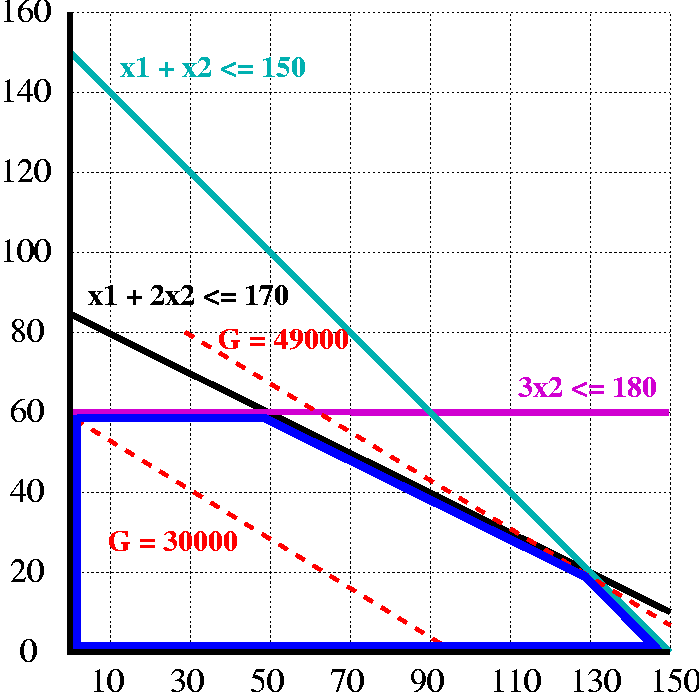

In [6]:
from IPython.core.display import Image, display
display(Image('https://upload.wikimedia.org/wikipedia/commons/4/46/Linear_programming_polytope.png', 
              width=300, unconfined=True))

In [7]:
### Zulässiger Bereich: (blaues Poyleder)
# durch Randbedingungen definiere zulässigen Punkte

# Iso-Gewinnfunktionen: (rot-gestrichelte Linien)
# Alle Punkte auf Linie haben denselben Zielfunktionswert


# Ziel: 
# Rot gestrichelte Linie so weit nach rechts oben zu schieben
# dass sie gerade noch das Polyeder berührt
# => alle Punkte sind dan optimal
#    hier Punkt: (130,20) ist die eindeutig optimale Ecke
#                mitoptimalen Zielfunktionswert 49.000 Euro

# Normalerweise: weder eindeutig noch ganzahlig
# z.b wenn gleichen Deckungsbeitrag - 
#     => dann Iso-Gewinnfunk. parallel zu ungleichung p1 + p2 < 150
#        dann jeder Punkt auf Strecke (130,20) und (150,0) optimal
#        => unendliche viele Optimallösungen